In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
train_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [3]:
test_data = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
test_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
print("Train Data Set ")
for column in train_data.columns:
    print(f'{column} : {train_data[column].isnull().sum()}')
print("\n")

print("Test Data Set")
for column in test_data.columns:
    print(f'{column} : {test_data[column].isnull().sum()}')

Train Data Set 
id : 0
person_age : 0
person_income : 0
person_home_ownership : 0
person_emp_length : 0
loan_intent : 0
loan_grade : 0
loan_amnt : 0
loan_int_rate : 0
loan_percent_income : 0
cb_person_default_on_file : 0
cb_person_cred_hist_length : 0
loan_status : 0


Test Data Set
id : 0
person_age : 0
person_income : 0
person_home_ownership : 0
person_emp_length : 0
loan_intent : 0
loan_grade : 0
loan_amnt : 0
loan_int_rate : 0
loan_percent_income : 0
cb_person_default_on_file : 0
cb_person_cred_hist_length : 0


In [6]:
print("Train Data Set ")
for column in train_data.columns:
    if train_data[column].dtype == "object":
        print(f'{column}: {train_data[column].unique()}',end = "\n")
print("\n")

print("Test Data Set")
for column in test_data.columns:
    if test_data[column].dtype == "object":
        print(f'{column}: {test_data[column].unique()}',end = "\n")

Train Data Set 
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file: ['N' 'Y']


Test Data Set
person_home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
loan_intent: ['HOMEIMPROVEMENT' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'MEDICAL']
loan_grade: ['F' 'C' 'E' 'A' 'D' 'B' 'G']
cb_person_default_on_file: ['N' 'Y']


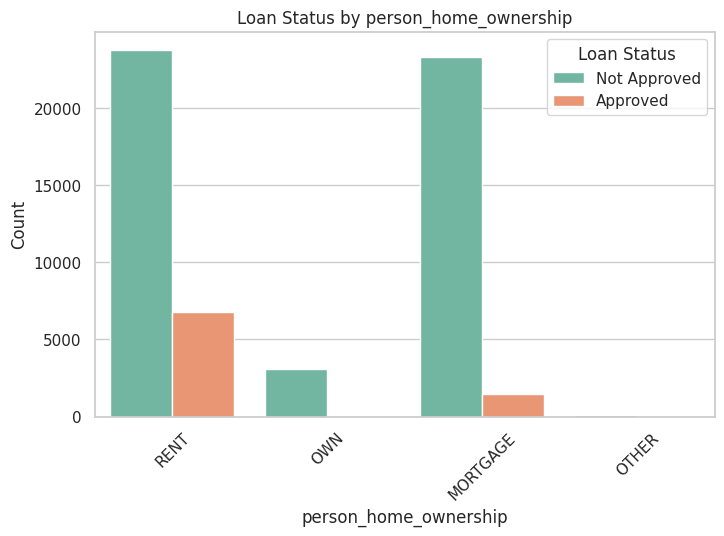

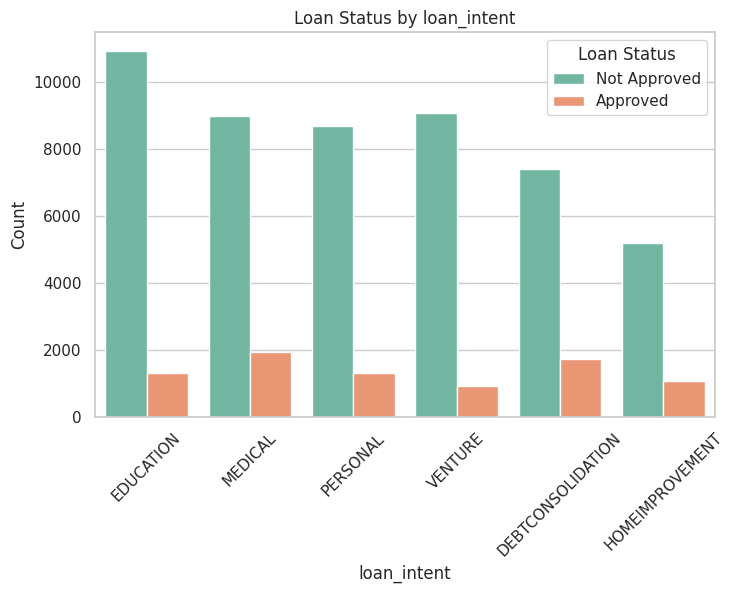

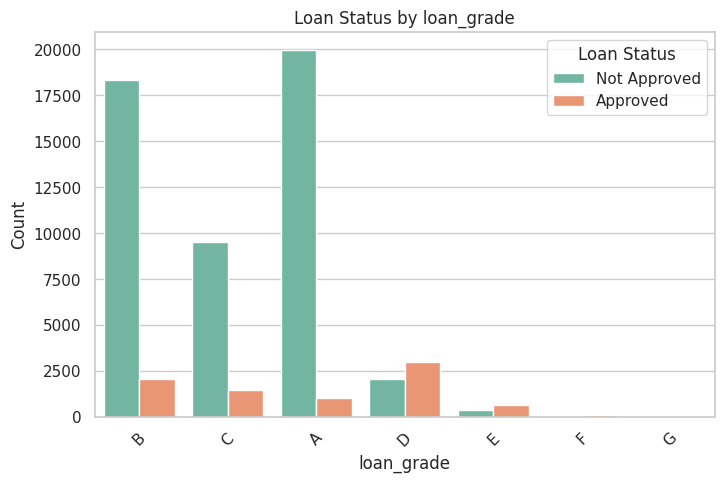

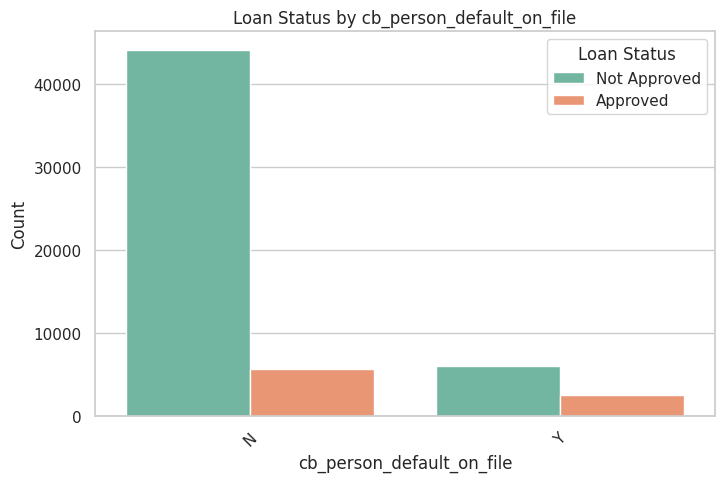

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Assuming loan_status is encoded as 0 (not approved) and 1 (approved)
# Function to create bar plots for categorical features
def plot_categorical_feature(feature):
    plt.figure(figsize=(8, 5))
    sns.countplot(data= train_data, x=feature, hue='loan_status', palette='Set2')
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
    plt.xticks(rotation=45)
    plt.show()

# List of categorical features to plot
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Create plots for each categorical feature
for feature in categorical_features:
    plot_categorical_feature(feature)


In [8]:
other_data = train_data["person_home_ownership"].value_counts()
print(other_data)

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64


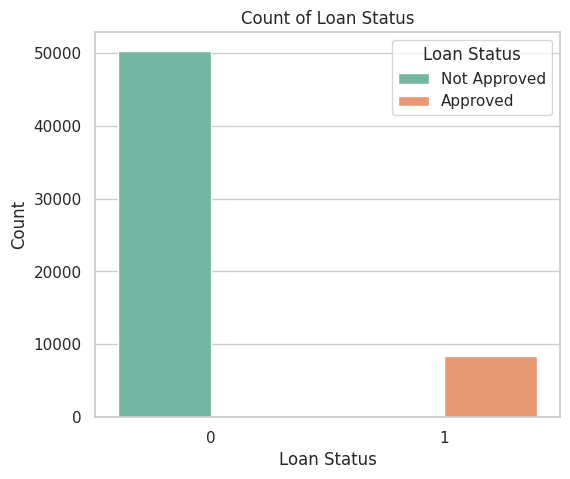

In [9]:
plt.figure(figsize=(6,5))
# Create a count plot for loan_status
sns.countplot(data=train_data, x='loan_status', hue='loan_status', palette='Set2')
# Set labels
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title = 'Loan Status',labels = ['Not Approved','Approved'])
plt.title('Count of Loan Status')
plt.show()

1. The target labels are imbalanced. 
2. Only the loan grade is the ordinal data cause the categories present in it can be arranged in the order
3. The other features are object data type are nominal data they are just characterstics of feature that is qualitative nature.

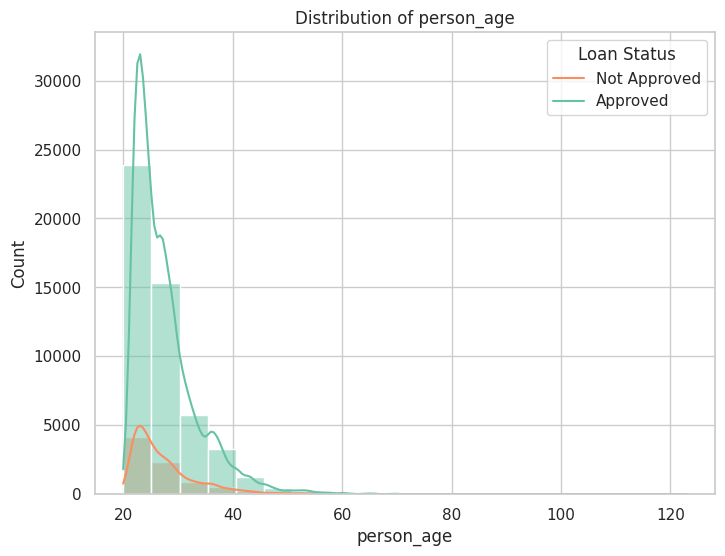

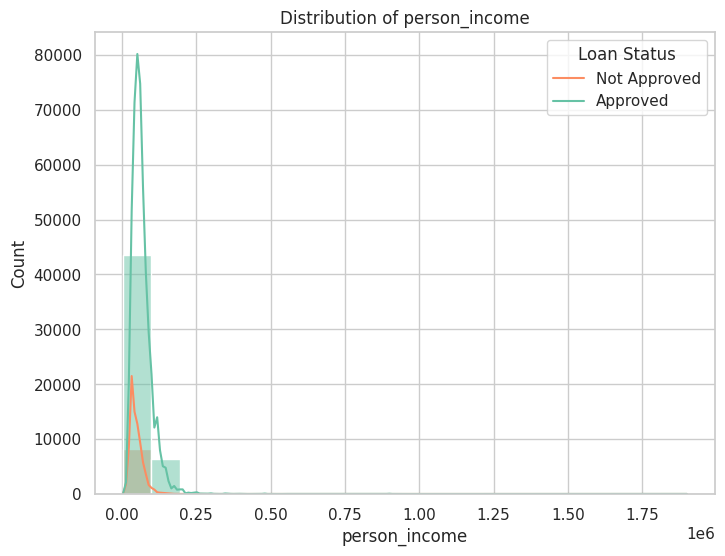

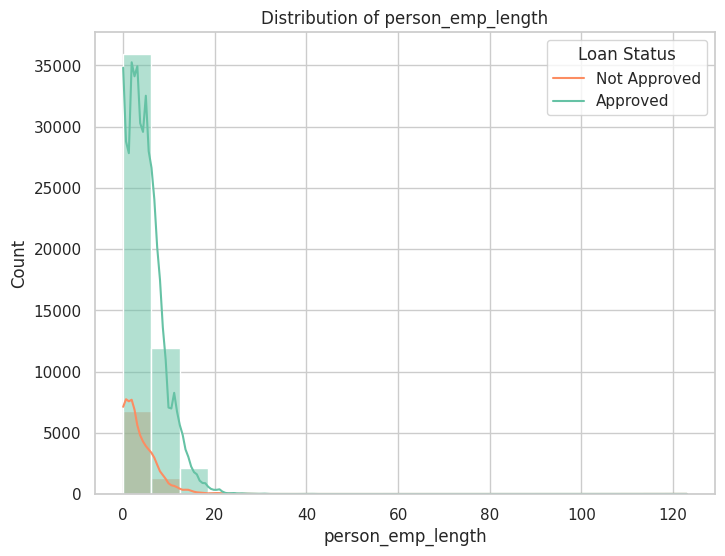

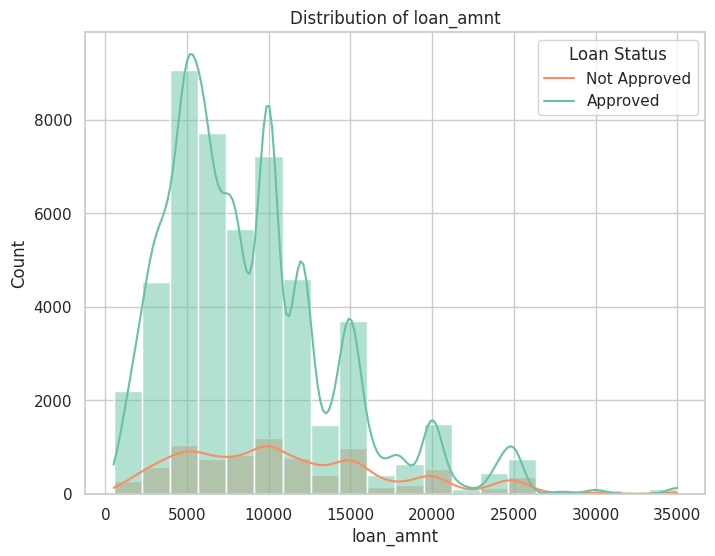

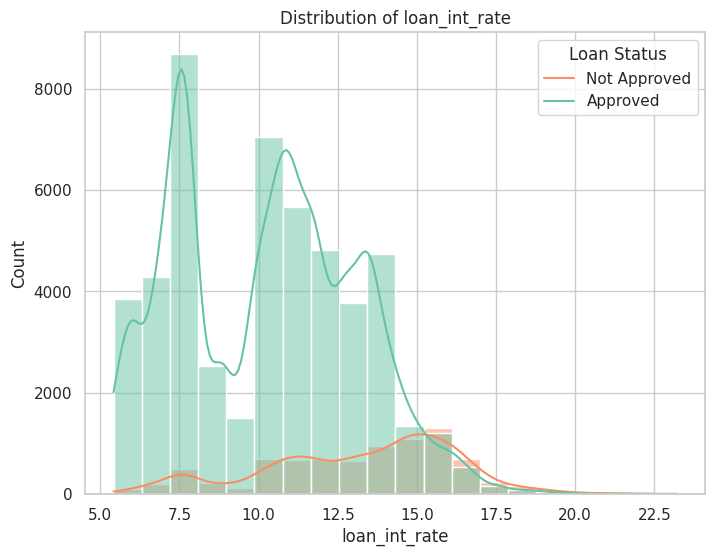

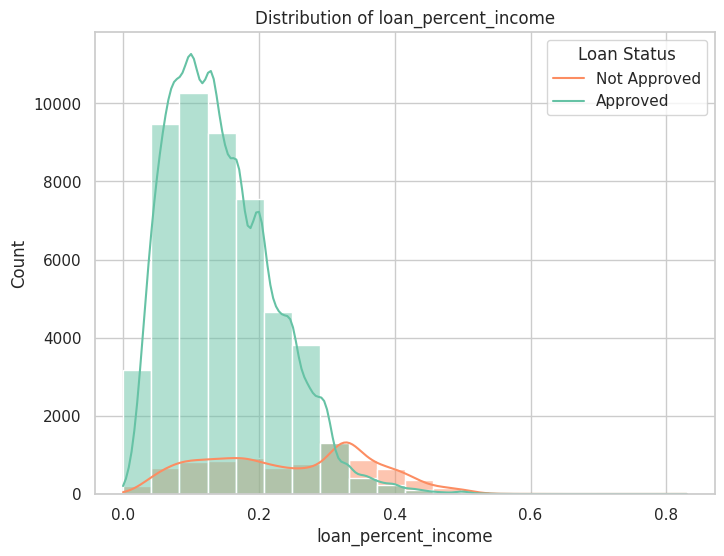

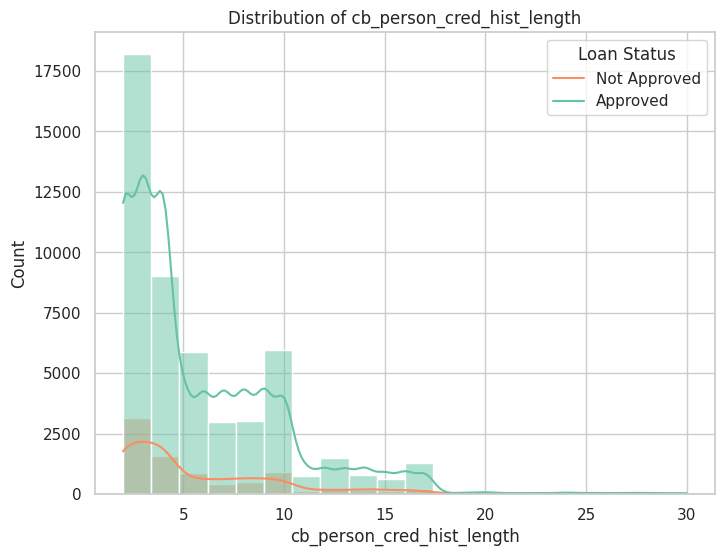

In [10]:
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')
numerical_features = []
for column in train_data.columns:
    if train_data[column].dtype!="object":
        numerical_features.append(column)
numerical_features.remove('id')
numerical_features.remove('loan_status')
for column in numerical_features:
    plt.figure(figsize=(8,6))
    # Plot histogram with KDE for each loan status
    sns.histplot(data=train_data, x=column, hue='loan_status', kde=True, 
                 stat='count', common_norm=False, palette='Set2', bins=20)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
    plt.show()

In [11]:
for feature in numerical_features:
    Q1 = train_data[feature].quantile(0.25)
    Q3 = train_data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = train_data[(train_data[feature]<lower_bound)|(train_data[feature]>upper_bound)]
    #print(f'outliers  for {feature }: {outlier}')
    # Print outliers for each feature
    #print(f'Outliers for {feature}:')
    #print(outlier)